# Decision Tree and random forest classification with Python

We'll try to use decision tree and  random forest to create a model that directly predicts weather a customer is going to purchase a product or not based on the age and estimated saraly.

Let's grab it and use it!

## Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Get the Data

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


## Check for null values

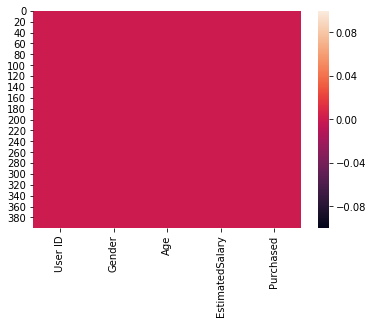

In [6]:
sns.heatmap(dataset.isnull())

In [7]:
dataset.drop(['Gender','User ID'], axis=1, inplace=True)

## Check correlation

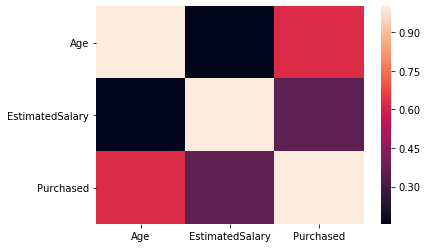

In [8]:
sns.heatmap(dataset.corr())

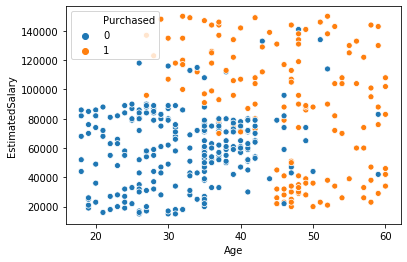

In [9]:
sns.scatterplot(x= 'Age', y='EstimatedSalary', data= dataset, hue= 'Purchased')

## Standardize the Variables

Because the Decision tree classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the decision tree classifier, than variables that are on a small scale.

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(dataset.drop('Purchased',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaled_features = scaler.transform(dataset.drop('Purchased',axis=1))

In [16]:
df_feat = pd.DataFrame(scaled_features,columns=['Age', 'EstimatedSalary'])
df_feat.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,dataset['Purchased'],
                                                    test_size=0.30)

## Using decision tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
y_pred = classifier.predict(X_test)

## Predictions and Evaluations

Let's evaluate our decision tree model!

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)

In [29]:
cm

array([[82,  8],
       [ 7, 23]])

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        90
           1       0.74      0.77      0.75        30

    accuracy                           0.88       120
   macro avg       0.83      0.84      0.84       120
weighted avg       0.88      0.88      0.88       120



## Using random forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
rfc_pred = rfc.predict(X_test)

## Predictions and Evaluations

Let's evaluate our random forest model!

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, rfc_pred)

In [26]:
cm

array([[81,  9],
       [ 5, 25]])

In [27]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        90
           1       0.74      0.83      0.78        30

    accuracy                           0.88       120
   macro avg       0.84      0.87      0.85       120
weighted avg       0.89      0.88      0.89       120

